### Student Information
Name: 黃俊瑋

Student ID: 108062308

GitHub ID: [tangerine1202](https://github.com/tangerine1202/) (alan0988469026@gmail.com)

Repo: [here](https://github.com/tangerine1202/DM2022-Lab1-Master)

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [84]:
### Begin Assignment Here
import os 
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA

## Instruction 1.

I finished it in `DM2022-Lab1-Master.ipynb` file, please refer to it. Thanks.

## Instruction 2.

#### Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration

### 1 Data Source 
### 2 Data Preparation
### 3.1 Data Transformation

In [85]:
def read_data(path, category):
  df = pd.read_csv( path, delimiter='\t', header=None, names=['text', 'sentiment'])
  df['text'] = df['text'].str.strip()
  df['category'] = category
  return df

In [86]:

amazon_df = read_data('./data/sentiment labelled sentences/amazon_cells_labelled.txt', 'amazon')
imdb_df = read_data('./data/sentiment labelled sentences/imdb_labelled.txt', 'imdb')
yelp_df = read_data('./data/sentiment labelled sentences/yelp_labelled.txt', 'yelp')

# Combine the dataframes
df = pd.concat([amazon_df, imdb_df, yelp_df], ignore_index=True)

print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2748 non-null   object
 1   sentiment  2748 non-null   int64 
 2   category   2748 non-null   object
dtypes: int64(1), object(2)
memory usage: 64.5+ KB
None


,text,sentiment,category
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon


In [87]:
# check label balance
print('# Total labels')
print(df['sentiment'].value_counts())
print()
print('# labels of each category')
print(df.groupby('category')['sentiment'].value_counts())

# Total labels
1    1386
0    1362
Name: sentiment, dtype: int64

# labels of each category
category  sentiment
amazon    0            500
          1            500
imdb      1            386
          0            362
yelp      0            500
          1            500
Name: sentiment, dtype: int64


### 3.2 Familiarizing yourself with the Data

In [88]:
print('\n# amazon')
pprint([text for text in df[df['category'] == 'amazon']['text'].sample(3)])
print('\n# imdb')
pprint([text for text in df[df['category'] == 'imdb']['text'].sample(3)])
print('\n# yelp')
pprint([text for text in df[df['category'] == 'yelp']['text'].sample(3)])


# amazon
["Don't bother - go to the store.",
 'Soyo technology sucks.',
 'The Jabra EarGels fit my ears very well.']

# imdb
['Exceptionally bad!',
 "But in terms of the writing it's very fresh and bold.",
 'Highly unrecommended.']

# yelp
["The only thing I wasn't too crazy about was their guacamole as I don't like "
 'it puréed.',
 'Today was my first taste of a Buldogis Gourmet Hot Dog and I have to tell '
 'you it was more than I ever thought possible.',
 'Waitress was a little slow in service.']


### 4.1 Missing Values

In [89]:
# no missing value in this dataset
df.isnull().sum(axis=0)

text         0
sentiment    0
category     0
dtype: int64

### 4.2 Duplicate Data

In [90]:
print('number of duplicated data:', df.duplicated().sum())
df[df.duplicated(keep=False)].sort_values(by='text')

number of duplicated data: 17


,text,sentiment,category
1590,10/10,1,imdb
1064,10/10,1,imdb
1165,Definitely worth checking out.,1,imdb
1029,Definitely worth checking out.,1,imdb
748,Does not fit.,0,amazon
446,Does not fit.,0,amazon
180,Don't buy this product.,0,amazon
543,Don't buy this product.,0,amazon
402,Excellent product for the price.,1,amazon
892,Excellent product for the price.,1,amazon


In [91]:
# Considering the text of row 744 & 179 are unlikely written by the different person,
# the duplicated data in the dataset may result from error in data collection processes
# rather than coincidence. And there is only small number of duplicated data, 
# so I decide to drop all the duplicated data.
print(df.loc[744, 'text'])
df.drop_duplicates(inplace=True)

If you like a loud buzzing to override all your conversations, then this phone is for you!


In [92]:
print(df.duplicated().sum(), '/', df.shape[0])

0 / 2731


### 5.1 Sampling

There is only 2731 data in the dataset, so I didn't do sampling now.

But I will do it in later part, e.g. visualization, analyzing the TF-IDF, etc.

<AxesSubplot: xlabel='category'>

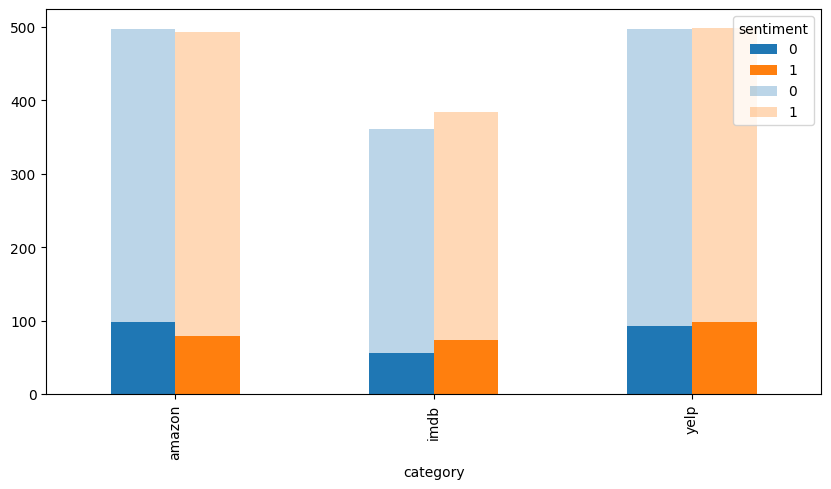

In [93]:
ax = df.sample(500).groupby('category')['sentiment'].value_counts().unstack().plot(kind='bar', figsize=(10, 5))
df.groupby('category')['sentiment'].value_counts().unstack().plot(kind='bar', ax=ax, alpha=0.3)

### 5.2 Feature Creation

In [94]:
df['unigrams'] = df['text'].apply(lambda x: nltk.word_tokenize(x, language='english'))

In [95]:
df['unigrams']

0       [So, there, is, no, way, for, me, to, plug, it...
1                    [Good, case, ,, Excellent, value, .]
2                           [Great, for, the, jawbone, .]
3       [Tied, to, charger, for, conversations, lastin...
4                                [The, mic, is, great, .]
                              ...                        
2743    [I, think, food, should, have, flavor, and, te...
2744                       [Appetite, instantly, gone, .]
2745    [Overall, I, was, not, impressed, and, would, ...
2746    [The, whole, experience, was, underwhelming, ,...
2747    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: unigrams, Length: 2731, dtype: object

### 5.3 Feature subset selection

In [96]:
count_vectorizer = CountVectorizer()
df_cnt_vect = count_vectorizer.fit_transform(df['text'])
df_cnt_vect = pd.DataFrame(df_cnt_vect.toarray(), columns=count_vectorizer.get_feature_names_out(), index=df.index)

print(df_cnt_vect.shape)
df_cnt_vect.head(3)

(2731, 5155)


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


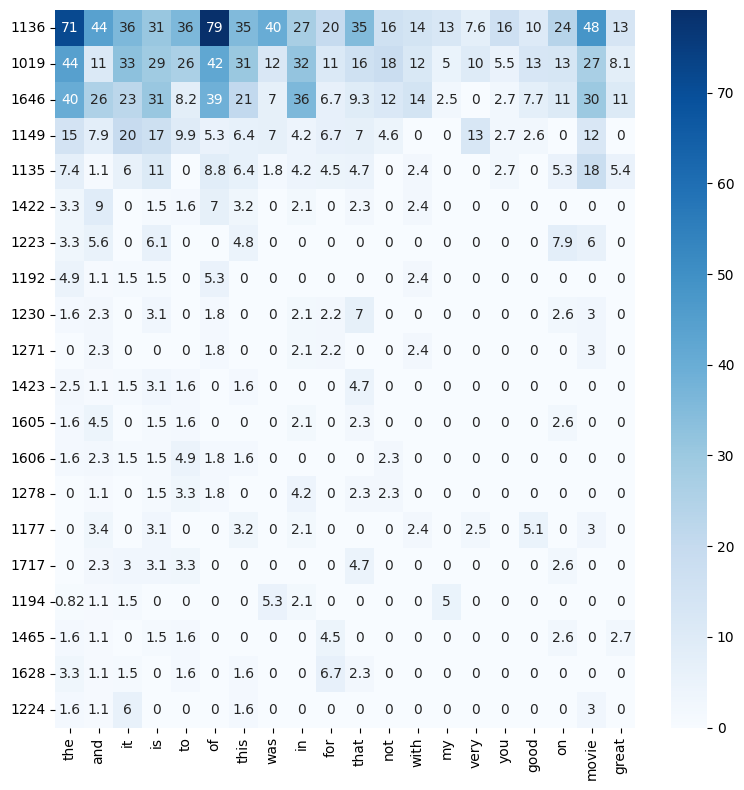

In [97]:
tmp = df_cnt_vect * np.log((df_cnt_vect.shape[0] + 1) / (df_cnt_vect.astype(bool).sum(axis=0) + 1))
cidx = tmp.sum(axis=0).sort_values(ascending=False).index
ridx = tmp.sum(axis=1).sort_values(ascending=False).index

plt.figure(figsize=(8, 8))
sns.heatmap(
  tmp.loc[ridx, cidx].iloc[:20, :20],
  cmap='Blues', 
  annot=True)

plt.yticks(rotation=0)
plt.tight_layout()

### 5.4 Dimensionality Reduction

In [98]:
df_reduced = PCA(n_components=3).fit_transform(df_cnt_vect) 
df_reduced = pd.DataFrame(df_reduced, columns=['PC1', 'PC2', 'PC3'], index=df.index)
df_reduced = pd.concat([df_reduced, df[['category', 'sentiment']]], axis=1)

print(df_reduced.shape)
print(df_reduced.describe())
df_reduced.head(3)

(2731, 5)
                PC1           PC2           PC3    sentiment
count  2.731000e+03  2.731000e+03  2.731000e+03  2731.000000
mean   2.081414e-16  4.162828e-17 -2.601768e-18     0.503845
std    3.315973e+00  7.594506e-01  6.724930e-01     0.500077
min   -1.082372e+00 -1.793978e+01 -6.222935e+00     0.000000
25%   -8.122684e-01 -2.381564e-01 -3.567749e-01     0.000000
50%   -2.962102e-01  1.739801e-02  2.916584e-02     1.000000
75%    3.353908e-01  2.696075e-01  3.583986e-01     1.000000
max    1.272076e+02  2.433912e+01  7.581791e+00     1.000000


,PC1,PC2,PC3,category,sentiment
0,0.727996,1.104281,-0.275850,amazon,0
1,-1.023317,0.026808,0.089650,amazon,1
2,-0.283988,-0.011336,0.616539,amazon,1


In [99]:
fig = px.scatter(df_reduced, x='PC1', y='PC2', color='sentiment', symbol='category', hover_data=['PC3'])

# move colorbar
fig.update_layout(coloraxis_colorbar=dict(orientation="h"))
fig.show()

In [100]:
fig = px.scatter_3d(df_reduced, x='PC1', y='PC2', z='PC3', color='sentiment', symbol='category')

fig.update_layout(coloraxis_colorbar=dict(orientation="h"))
fig.show()

### 5.5 Attribute Transformation / Aggregation

In [101]:
# visualize the word frequency in different sentiment
tmp = df_cnt_vect.copy()
tmp['label_sentiment'] = df['sentiment']
tmp['label_sentiment'].value_counts()

1    1376
0    1355
Name: label_sentiment, dtype: int64

In [102]:
# words 'great', 'good', 'not', 'bad' have great different frequency in different sentiment
tmp_df = tmp.groupby(by='label_sentiment').sum().unstack().unstack()
tmp_df = tmp_df.loc[tmp_df.sum(axis=1).sort_values(ascending=False).index, :]

px.bar(tmp_df.iloc[:100, :], barmode='group')

### 5.6 Discretization and Binarization

In [103]:
# represent the category in one-hot form
tmp = df.copy()
tmp = pd.concat([tmp, pd.get_dummies(tmp['category'])], axis=1)
tmp.head(3)

,text,sentiment,category,unigrams,amazon,imdb,yelp
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...",1,0,0
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]",1,0,0
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]",1,0,0


### 6 Data Exploration

In [104]:
# consin similarity
total = df['text'].sample(3, replace=False)
d1 = total.iloc[0:1]
d2 = total.iloc[1:2]
d3 = total.iloc[2:3]

print(d1.shape)
print(d2.shape)
print(d3.shape)

(1,)
(1,)
(1,)


In [105]:
# from sklearn.preprocessing import binarize

count_vectorizer = CountVectorizer()
count_vectorizer.fit(total)

dv1 = count_vectorizer.transform(d1)
dv2 = count_vectorizer.transform(d2)
dv3 = count_vectorizer.transform(d3)

# dv1_bin = binarize(dv1)
# dv2_bin = binarize(dv2)
# dv3_bin = binarize(dv3)
div1_bin = dv1 > 0
div2_bin = dv2 > 0
div3_bin = dv3 > 0

print(dv1_bin.shape)
print(dv2_bin.shape)
print(dv3_bin.shape)
# print(dv1_bin.toarray())

(100, 1197)
(100, 1197)
(100, 1197)


In [106]:
from sklearn.metrics.pairwise import cosine_similarity

cos_12 = cosine_similarity(dv1, dv2)
cos_13 = cosine_similarity(dv1, dv3)
cos_23 = cosine_similarity(dv2, dv3)

print(cos_12)
print(cos_13)
print(cos_23)

[[0.27602622]]
[[0.08164966]]
[[0.16903085]]


# Instruction 3.

### TF-IDF & term-doc

In [107]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

df_count = count_vectorizer.fit_transform(df['text'])
df_tfidf = tfidf_vectorizer.fit_transform(df['text'])
df_count = pd.DataFrame(df_count.toarray(), columns=count_vectorizer.get_feature_names_out(), index=df.index)
df_tfidf = pd.DataFrame(df_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df.index)

print(df_count.shape)
print(df_tfidf.shape)

(2731, 5155)
(2731, 5155)


### Data Visualization

### Naive Bayes Classifier